# Importing the Libraries

In [147]:
import pandas as pd    # pandas data processing library
import numpy as np     # numpy linear lgebra library
from sklearn.tree import DecisionTreeRegressor     # for applying Decision Tree Regression
from sklearn.linear_model import LinearRegression, Lasso,Ridge # for applying linear regression,lasso and ridge models 
from sklearn import svm  #importing svm librarry for uing svr
from sklearn.model_selection import cross_val_score   # for checking cross validation scores
import scipy #scientific computing library
import matplotlib.pyplot as plt # importing the data visuslisation Library
import seaborn as sns  # another data visualization Library

# Merging the two data sets

In [148]:
math = pd.read_csv("student-mat.csv")         
port = pd.read_csv("student-por.csv")
final = [math,port]
final=pd.concat(final)    #concating the two datasets

In [149]:
#dropping duplicate entries in the final dataset
final = final.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [150]:
final.info()    # chceking for the non-null and data types of the various columns present in the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 642
Data columns (total 33 columns):
school        662 non-null object
sex           662 non-null object
age           662 non-null int64
address       662 non-null object
famsize       662 non-null object
Pstatus       662 non-null object
Medu          662 non-null int64
Fedu          662 non-null int64
Mjob          662 non-null object
Fjob          662 non-null object
reason        662 non-null object
guardian      662 non-null object
traveltime    662 non-null int64
studytime     662 non-null int64
failures      662 non-null int64
schoolsup     662 non-null object
famsup        662 non-null object
paid          662 non-null object
activities    662 non-null object
nursery       662 non-null object
higher        662 non-null object
internet      662 non-null object
romantic      662 non-null object
famrel        662 non-null int64
freetime      662 non-null int64
goout         662 non-null int64
Dalc          662 no

In [151]:
math.columns   # checkin the columns present in the first data set

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [152]:
final.columns   # checking for the columns in the concatenated dataset formed after dropping the repeated columns 

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Data Visualization

Age wise Distribution of the dataset

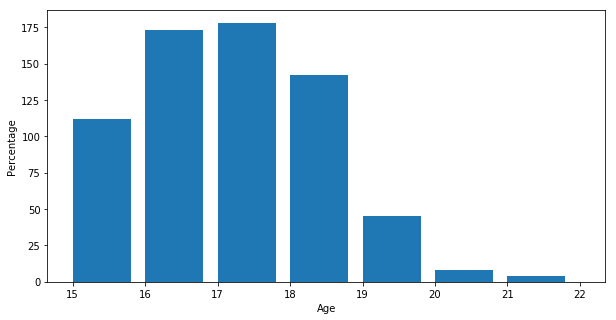

In [153]:
plt.figure(figsize=(10,5))
plt.hist(data.age,bins=7,width=0.8)
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.show()

## Finding the correlation between the fvarious features in the dataset

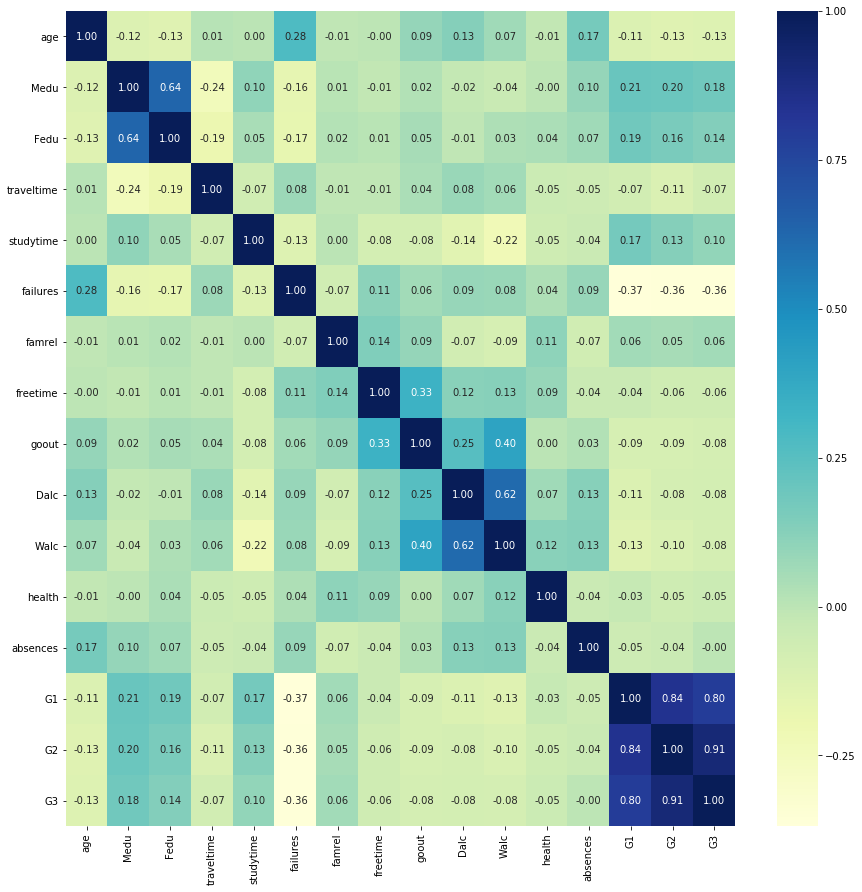

In [154]:
plt.figure(figsize=(15,15))
sns.heatmap(final.corr(),annot = True,fmt = ".2f",cbar = True,cmap = "YlGnBu")


Most of the features are independent of each other as we can see from the correlation matrix,but G1,G2,G3 are highly correlated to each other

## grade distribution in different periods

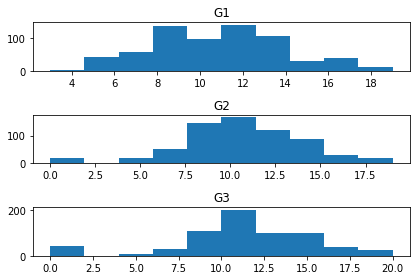

In [155]:
grades = ['G1','G2','G3']       #defining the grades
i = 1
for w in grades:               # function to plot the grade wise distribution histogram
    plt.subplot(3, 1, i)
    plt.tight_layout()
    i += 1
    plt.hist(final[w])
    plt.title(w)

### As we have previously saw that G2 and G1 are highly correlated so we are trying to predict the G2 values on the basis of G1 values

Mean squared error: 3.63
Variance score: 0.71


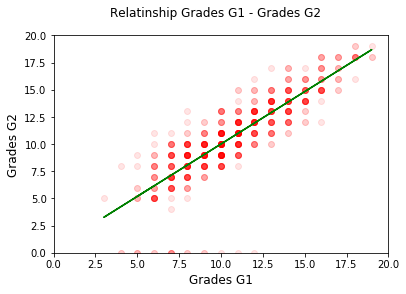

In [156]:
y = final['G2']
X = final['G1']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
linreg = LinearRegression()         
linreg.fit(X,y)
y_pred = linreg.predict(X)
fig = plt.figure()                  
plt.scatter(X,y, color='red', alpha=.1)
fig.suptitle('Relatinship Grades G1 - Grades G2', fontsize=12)
plt.xlabel('Grades G1', fontsize=12)
plt.ylabel('Grades G2', fontsize=12)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.plot(X,y_pred, color='green')           
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((linreg.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linreg.score(X, y))

### As we have previously saw that G3 and G2 are highly correlated so we are trying to predict the G3 values on the basis of G2 values

Mean squared error: 2.79
Variance score: 0.83


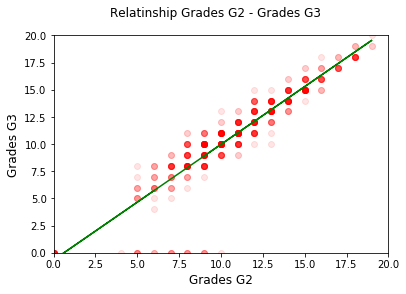

In [157]:
y = data['G3']
X = data['G2']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)
fig = plt.figure()
plt.scatter(X,y, color='red', alpha=.1)
fig.suptitle('Relatinship Grades G2 - Grades G3', fontsize=12)
plt.xlabel('Grades G2', fontsize=12)
plt.ylabel('Grades G3', fontsize=12)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.plot(X,y_pred, color='green')
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((linreg.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linreg.score(X, y))

# Our Aim is to Predict G3 so we set other columns as independent 

In [158]:
X = final.loc[:,final.columns != 'G3']     # creating the set of features to predict G3
y = final.loc[:,final.columns == 'G3']     # target variable

In [159]:
X = pd.get_dummies(X)

# Applying Different Models to the dataset

### Applying Linear regression

In [160]:
model=LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('mean square error',mean_squared_error(y_test, y_pred))
print('cross validation score : ',cross_val_score(model, X, y, cv=5).mean())
print('r2 score : ',r2_score(y_test,y_pred))

mean square error 3.4517135137888655
cross validation score :  0.7976586396449088
r2 score :  0.8144596225709186


### Applying SVR Model

In [161]:
from sklearn import svm
svm_reg=svm.SVR()
svm_reg.fit(X_train,y_train)
y1_svm=svm_reg.predict(X_train)
y1_svm=list(y1_svm)  
y2_svm=svm_reg.predict(X_test)
y2_svm=list(y2_svm)
print('mean square error : ',mean_squared_error(y_test, y2_svm))
print('cross validation score : ',cross_val_score(svm_reg, X, y, cv=5).mean())
print('r2 score : ',r2_score(y_test,y2_svm))

C:\Users\YASH VATSA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\YASH VATSA\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\YASH VATSA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\YASH VATSA\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale

mean square error :  4.242515148660055
cross validation score :  0.7708879410908647
r2 score :  0.7719515658566527


### Applying Lasso Model

In [162]:
model =  Lasso(alpha = 0.01,normalize = True,selection = 'random')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('mean square error : ',mean_squared_error(y_test, y_pred))
print('cross validation score : ',cross_val_score(lasso, X, y, cv=5).mean())
print('r2 score : ',r2_score(y_test,y_pred))

mean square error :  3.387829359570698
cross validation score :  0.8245934862825953
r2 score :  0.8178935953030199


### Applying Decision Tree Regression

In [163]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('means square error : ',mean_squared_error(y_pred, y_test))
print('cross validation score : ',cross_val_score(model,X,y,cv = 5).mean())
print('r2 score : ',r2_score(y_test,y_pred))

means square error :  3.7042535292540224
cross validation score :  0.7164328872245157
r2 score :  0.8008848083233948


# As we can see from the metrics analysis over the four regression models, the lasso model has the Highest r2 and the minimum mean square error. So, It can be concluded that lasso is the best model to be used in this dataset to train our data.The Best possible reason to support this is that Lasso takes into account the problem of ovefitting by performing both feature selection and regularization in order to enhance the accuracy and interpretation of the model.